In [2]:
!tar -xzvf Archive.zip

x customer_reviews.csv
x __MACOSX/._customer_reviews.csv
x handwritten_digits/
x __MACOSX/._handwritten_digits
x handwritten_digits/.DS_Store
x __MACOSX/handwritten_digits/._.DS_Store
x handwritten_digits/9/
x __MACOSX/handwritten_digits/._9
x handwritten_digits/0/
x __MACOSX/handwritten_digits/._0
x handwritten_digits/7/
x __MACOSX/handwritten_digits/._7
x handwritten_digits/6/
x __MACOSX/handwritten_digits/._6
x handwritten_digits/1/
x __MACOSX/handwritten_digits/._1
x handwritten_digits/8/
x __MACOSX/handwritten_digits/._8
x handwritten_digits/4/
x __MACOSX/handwritten_digits/._4
x handwritten_digits/3/
x __MACOSX/handwritten_digits/._3
x handwritten_digits/2/
x __MACOSX/handwritten_digits/._2
x handwritten_digits/5/
x __MACOSX/handwritten_digits/._5
x handwritten_digits/9/Nine_full (1256).jpg
x __MACOSX/handwritten_digits/9/._Nine_full (1256).jpg
x handwritten_digits/9/Nine_full (936).jpg
x __MACOSX/handwritten_digits/9/._Nine_full (936).jpg
x handwritten_digits/9/Nine_full (1606).

In [1]:
import matplotlib
print(matplotlib.__version__)


3.9.2



# Question 1: Text Preprocessing and Feature Extraction
You are given a dataset containing  customer reviews of a product. The dataset is stored in a CSV file named **customer_reviews.csv**, where each row consists of the review title, customer name, Rating, Date, Category Comments  and a rating. Your task is to:

## Load the dataset using pandas.
- Perform text tokenization, stop word removal, and stemming using NLTK.
- Apply TF-IDF vectorization to convert the reviews into numerical features.
- Identify and visualize the top 20 most common words across all reviews.

In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ammar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ammar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [3]:
# load dataset
df= pd.read_csv("customer_reviews.csv",encoding='ISO-8859-1')
df

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful
...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN
276,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN
277,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",NaN
278,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,I love mi,NaN


In [6]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess(text):
    # tokenize
    tokens = word_tokenize(text)
    # remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # stemming
    filtered_tokens = [ps.stem(word) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(filtered_tokens)
df['preprocessed_text'] = df['Comments'].apply(preprocess)
df.preprocessed_text

0      anoth midrang killer smartphon xiaomi major hi...
1                                ok vri small size mobil
2                                              quit good
3      redmi alway king budget yet anoth gave us redm...
4      worst product mi hardcor fan mi one realli dis...
                             ...                        
275              like phone awesom look design use phone
276                    product avasom invoic note includ
277    redmi seem older model better perform use mode...
278                                              love mi
279    old configur higher price worth money camera q...
Name: preprocessed_text, Length: 280, dtype: object

In [7]:
vectorizer = TfidfVectorizer()
tfidfmatrix = vectorizer.fit_transform(df.preprocessed_text)
# Sum TF-IDF scores for each word
tfidf_sum = tfidfmatrix.sum(axis=0)
words_scores = [(word, tfidf_sum[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_scores = sorted(words_scores, key=lambda x: x[1], reverse=True)

# Get top 20 words
top_20_words = words_scores[:20]
top_20_words

[('good', np.float64(42.85099317157354)),
 ('nice', np.float64(20.347144262549815)),
 ('phone', np.float64(20.13278222109958)),
 ('camera', np.float64(13.49716947819398)),
 ('product', np.float64(12.719537223627528)),
 ('best', np.float64(11.208659005157484)),
 ('mobil', np.float64(9.914568715542842)),
 ('qualiti', np.float64(9.68497094518814)),
 ('batteri', np.float64(9.047547403430396)),
 ('buy', np.float64(7.577900605841435)),
 ('display', np.float64(7.418161752267205)),
 ('awesom', np.float64(7.340169821636234)),
 ('mi', np.float64(7.164865854876979)),
 ('money', np.float64(6.9153656137309225)),
 ('like', np.float64(6.673518215772946)),
 ('one', np.float64(5.705732954555297)),
 ('price', np.float64(5.693721723865156)),
 ('love', np.float64(5.563419306183194)),
 ('ok', np.float64(5.427089858777043)),
 ('valu', np.float64(5.289388004598029))]

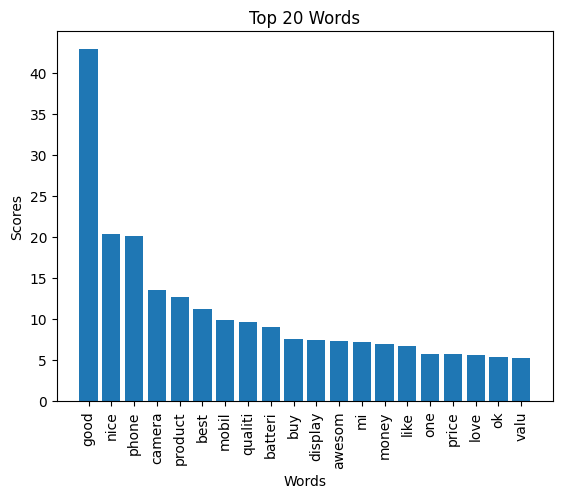

In [8]:
# our words with scores
words, scores = zip(*top_20_words)
# words, scores
# Plot the top 20 words
plt.bar(words, scores)
plt.xlabel('Words')
plt.ylabel('Scores')
plt.title('Top 20 Words')
plt.xticks(rotation=90)
plt.show()

# Question 2: Advanced Text Preprocessing for Classification
Given a dataset containing tweets, you are required to classify the tweets into categories (positive, negative, neutral). The dataset is stored in **tweets.csv** with the following structure:

- tweet_text (string): The tweet itself.
- sentiment (string): Either "positive", "negative", or "neutral".


## Tasks:

- Tokenize the text into words and remove special characters using regular expressions.
- Use the NLTK library to perform sentiment analysis on each tweet.
- Use TF-IDF to convert the processed text into numerical vectors.
- Train a machine learning model Naive Bayes to classify the sentiment of each tweet.
- Evaluate the model's performance using accuracy, precision, and recall.

**Note:** Divde the data into 70 to 30 for training and testing


In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Download the NLTK punkt and stopwords resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
tweets_df = pd.read_csv('tweets.csv', encoding='ISO-8859-1')

# Tokenize the text into words and remove special characters using regular expressions
def preprocess_text(text):

    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)  # Tokenize the text into words
    tokens = [word for word in tokens if word not in set(stopwords.words('english')) and word.isalpha()]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to the tweet_text column
tweets_df.dropna(subset=['text'], inplace=True)
tweets_df['processed_text'] = tweets_df['text'].apply(preprocess_text)

# Use TF-IDF to convert the processed text into numerical vectors
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(tweets_df['processed_text'])

# Define the target variable (sentiment)
y = tweets_df['sentiment']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Naive Bayes model to classify the sentiment of each tweet
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict the sentiment of the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model's performance using accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ammar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ammar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.586239396795476
Precision: 0.6378840062522816
Recall: 0.586239396795476


# Question 3: Data Wrangling and Cleaning
You have been provided with a large CSV dataset named **sales_data.csv** consisting records of sales transactions. The dataset contains missing values and outliers.

## Your task is to:

- Identify and fill missing values using appropriate strategies (mean/mode/median).
- Detect and remove outliers in the price column.
- Normalize the price column using Min-Max scaling.
- Create a summary report showing the number of missing values before and after cleaning, and the number of outliers detected and removed.

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('sales_data.csv')

# price to numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# before cleaning
missing_values_before = df.isnull().sum()
print("Missing values before cleaning:\n", missing_values_before)

df['price'].fillna(df['price'].mean(), inplace=True)
df['stars'].fillna(df['stars'].mode()[0], inplace=True)

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers_count = outliers.shape[0]

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

scaler = MinMaxScaler()
df['price'] = scaler.fit_transform(df[['price']])

# after cleaning
missing_values_after = df.isnull().sum()
print("\nMissing values after cleaning:\n", missing_values_after)

print("\nNumber of outliers detected and removed:", outliers_count)

df.to_csv('cleaned_sales_data.csv', index=False)

print("\nData cleaning and wrangling completed. Cleaned data saved to 'cleaned_sales_data.csv'.")

Missing values before cleaning:
 name              0
author            0
narrator          0
time              0
releasedate       0
language          0
stars             0
price          9474
dtype: int64

Missing values after cleaning:
 name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

Number of outliers detected and removed: 0


C:\Users\ammar\AppData\Local\Temp\ipykernel_14480\4031657016.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(), inplace=True)
C:\Users\ammar\AppData\Local\Temp\ipykernel_14480\4031657016.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F


Data cleaning and wrangling completed. Cleaned data saved to 'cleaned_sales_data.csv'.


# Question 4: Image Preprocessing and Feature Extraction

You are tasked with analyzing images of handwritten digits (0-9). The dataset contains 2000 images stored in a folder named **handwritten_digits**. Each image is 28x28 pixels in grayscale. Perform the following tasks:

- Load all images using OpenCV and store them in a NumPy array.
- Preprocess the images by normalizing the pixel values (scale between 0 and 1).
- Apply edge detection to each image using Canny edge detection.
- Extract HOG (Histogram of Oriented Gradients) features from each image.
- Split the dataset into a training and test set and save them to separate CSV files.

In [11]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the path to the dataset
dataset_path = 'handwritten_digits'

# Initialize lists to hold images and labels
images = []
labels = []

# Load images and labels
for label in range(10):
    label_path = os.path.join(dataset_path, str(label))
    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            images.append(image)
            labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize the pixel values (scale between 0 and 1)
images = images / 255.0

# Ensure images are in the correct format for Canny edge detection
images_uint8 = (images * 255).astype(np.uint8)

# Apply Canny edge detection to each image
edges = [cv2.Canny(image, 100, 200) for image in images_uint8]

# Extract HOG features from each image
list_hog = []
for feature in images:
    fd = hog(feature, orientations=9, pixels_per_cell=(14,14),cells_per_block=(1,1) )
    list_hog.append(fd)
hog_features = np.array(list_hog, 'float64')

# Split the dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

# Save the training and test sets to separate CSV files
train_data = np.column_stack((X_train, y_train))
test_data = np.column_stack((X_test, y_test))

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("Data processing completed. Training and test sets saved to 'train_data.csv' and 'test_data.csv'.")


Data processing completed. Training and test sets saved to 'train_data.csv' and 'test_data.csv'.
